In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import pandas as pd
import os
import ipywidgets as widgets
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from Project.Utils.visualize import  get_zone
from sklearn.neighbors import KNeighborsRegressor


In [2]:
output_path = os.getcwd() + '/Output/'
df_gold = pd.read_csv(output_path + 'GoldDataframe.csv', index_col = ['Country', 'Year', 'Region'])



country_list = list(np.sort(df_gold.index.get_level_values('Country').unique()))

In [3]:
df_gold.describe()

,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,GDP,% Soldiers,Employment in industry,Employment in services,Birth Rate,Cost business start-up,Death Rate,...,Researchers in R&D,R&D expenditure %GDP,% Rural Population,Tertiary School Gender Parity,% Vulnerable female employment,% Vulnerable male employment,Civil Liberties,Freedom of Expression,% Healthcare Investment,Population
count,3213.000000,1533.000000,672.000000,3.234000e+03,2877.000000,3213.000000,3213.000000,3234.000000,2457.000000,3234.000000,...,798.000000,1260.000000,3213.000000,1449.000000,3213.000000,3213.000000,3108.000000,3108.000000,3087.000000,3.234000e+03
mean,12.042824,0.964251,4639.220633,3.866347e+05,1.354753,19.615531,52.557261,22.098592,50.996500,8.438147,...,3009.726975,1.170491,42.852291,1.124346,40.984734,37.248506,0.710929,0.700331,9.990803,4.047051e+07
std,12.526777,1.871637,10758.955845,1.561779e+06,1.702522,8.333901,18.594560,11.101206,121.715121,3.435752,...,1974.779659,1.001950,23.138418,0.274921,32.149184,26.141736,0.246171,0.270264,4.841173,1.516173e+08
min,0.028408,0.002324,2.810000,7.223028e+01,0.000000,0.390000,5.980000,5.600000,0.000000,1.127000,...,129.732391,0.015900,0.000000,0.206580,0.020000,0.150000,0.013000,0.012000,0.630000,8.099800e+04
25%,2.622340,0.224330,524.850000,7.061019e+03,0.462659,14.140000,38.320000,12.000000,4.200000,5.992250,...,1261.949829,0.389280,23.384000,1.031450,9.740000,14.330000,0.571000,0.590000,6.500000,2.704163e+06
50%,7.447570,0.526846,1201.165500,2.598088e+04,0.901438,19.900000,55.169998,19.874500,14.400000,7.800000,...,2885.816284,0.804525,42.285000,1.198460,33.540001,30.699999,0.769500,0.787000,9.390000,8.467560e+06
75%,18.129000,1.052712,4137.630500,1.738813e+05,1.582587,24.910000,67.730003,30.813250,47.300000,10.100000,...,4472.419922,1.717325,61.327000,1.290200,72.410002,57.429999,0.919000,0.906000,13.285000,2.418336e+07
max,79.688300,29.886600,63208.566000,2.137258e+07,20.398734,59.580002,88.510002,53.541000,1540.200000,23.594000,...,7930.181152,4.796620,91.754000,1.872170,99.270000,92.399998,0.993000,0.989000,42.050000,1.439324e+09


In [4]:
""" def table_high_country(mode, zone):
    
    
    

dropdown_mode = widgets.Dropdown(
    options = ['Country', 'Region'],
    description = 'Select: '
)

zone_drop_machine = widgets.Dropdown(
    options= country_list,
    value ='Afghanistan',
    description='Zone:',
)

widgets.interact(table_high_country, mode = dropdown_mode, zone = zone_drop_machine) """

" def table_high_country(mode, zone):\n    \n    \n    \n\ndropdown_mode = widgets.Dropdown(\n    options = ['Country', 'Region'],\n    description = 'Select: '\n)\n\nzone_drop_machine = widgets.Dropdown(\n    options= country_list,\n    value ='Afghanistan',\n    description='Zone:',\n)\n\nwidgets.interact(table_high_country, mode = dropdown_mode, zone = zone_drop_machine) "

In [5]:
from sklearn.preprocessing import StandardScaler
df = df_gold.loc[df_gold.index.get_level_values('Region') == 'South Asia']
df.dropna(axis=1, inplace=True)


from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('GDP', axis=1)
y_train = train['GDP']

x_test = test.drop('GDP', axis = 1)
y_test = test['GDP']



C:\Users\smanoles\AppData\Local\Temp\ipykernel_18044\4116017885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [7]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(len(x_train.index)):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 49274.09171999187
RMSE value for k=  2 is: 88356.65775363012
RMSE value for k=  3 is: 108398.08546472115
RMSE value for k=  4 is: 129545.33508252364
RMSE value for k=  5 is: 149144.29744493146
RMSE value for k=  6 is: 165132.7039592897
RMSE value for k=  7 is: 170256.1141187162
RMSE value for k=  8 is: 184974.27459009286
RMSE value for k=  9 is: 207224.11689798467
RMSE value for k=  10 is: 222253.49824555562
RMSE value for k=  11 is: 244200.1702691529
RMSE value for k=  12 is: 261744.97514070614
RMSE value for k=  13 is: 279382.0963160869
RMSE value for k=  14 is: 296874.69045710255
RMSE value for k=  15 is: 313624.2223853426
RMSE value for k=  16 is: 328555.9549735133
RMSE value for k=  17 is: 342622.11457434454
RMSE value for k=  18 is: 359214.25001813634
RMSE value for k=  19 is: 374536.65631715104
RMSE value for k=  20 is: 387858.9917849053
RMSE value for k=  21 is: 400222.150345533
RMSE value for k=  22 is: 412419.5699345751
RMSE value for k=  23 is: 42147

<AxesSubplot:>

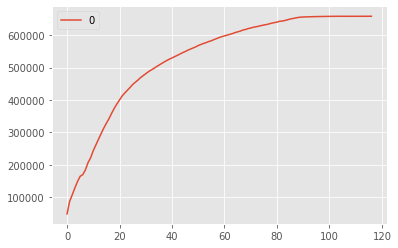

In [8]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [42]:
df = df_gold.loc[df_gold.index.get_level_values('Country') == 'France']
df.dropna(axis=1, inplace=True)
df.reset_index(drop = True, inplace=True)

C:\Users\smanoles\AppData\Local\Temp\ipykernel_17600\2271269440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [46]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error 
#Separate Features and target
X_Target= df.iloc[1:-1]
X_Target = X_Target.loc[:, X_Target.columns == "GDP"] # the 
feature_df= df.iloc[:-2]
feature_df= feature_df.loc[:, feature_df.columns != 'GDP']
#Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_df, X_Target, test_size=0.3, random_state=0)
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elastic_cv= ElasticNetCV(alphas=alphas, cv=5, max_iter = 100000, tol = 0.001)
model = elastic_cv.fit(X_train, y_train)
ypred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, ypred)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

c:\Users\smanoles\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2:0.8579, MSE:29301517162.5104, RMSE:171176.8593


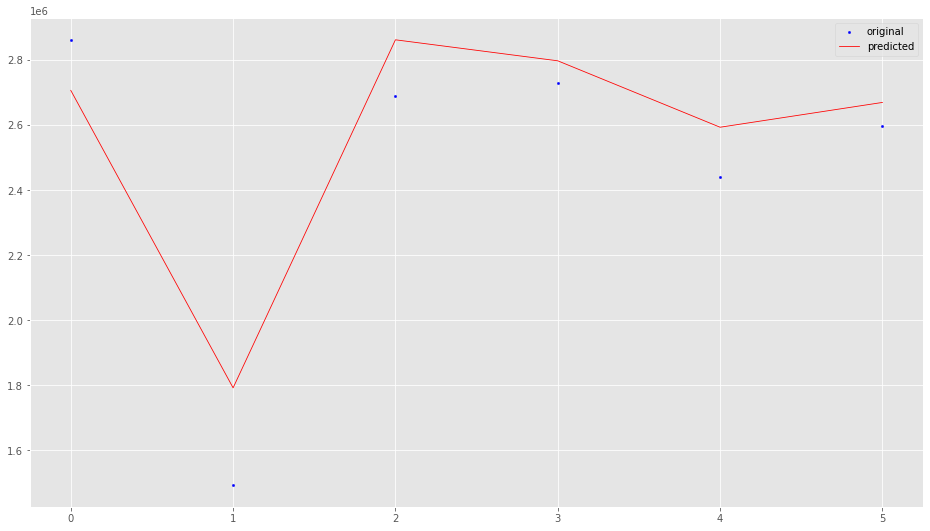

In [47]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [53]:
#pred_df= df.iloc[:]
pred_df  =df
pred_df= pred_df.loc[:, pred_df.columns != 'GDP']
prediction  = model.predict(pred_df)
print(prediction)
""" print(prediction[0] * 0.85)
print(prediction[0])
print(prediction[0] * 1.15) """

[1467528.92875402 1791641.80321023 1912319.81229964 2117380.44886784
 2227326.5005587  2351674.00041563 2575710.69909365 2752218.64357747
 2861393.13258289 2711690.68638229 2705963.31557728 2799910.67085792
 2790636.73756491 2802448.9145548  2592670.77691507 2537359.36925342
 2668867.95736926 2746428.46931678 2796829.13113289 2884088.64410324
 2748642.02723264]


' print(prediction[0] * 0.85)\nprint(prediction[0])\nprint(prediction[0] * 1.15) '

In [35]:
pred_df= df.iloc[-1:]
pred_df= pred_df.loc[:, pred_df.columns != 'GDP']
pred_df

,AgriShareGDP,EmploymentRural,% Soldiers,Employment in industry,Employment in services,Birth Rate,Cost business start-up,Death Rate,Employment in agriculture,% Female Employment,...,Researchers in R&D,R&D expenditure %GDP,% Rural Population,Tertiary School Gender Parity,% Vulnerable female employment,% Vulnerable male employment,Civil Liberties,Freedom of Expression,% Healthcare Investment,Population
20,1.59684,9630.275,1.001357,20.43,77.040001,10.9,0.7,9.1,2.53,46.596001,...,4926.188965,2.35493,19.025,1.2011,6.53,9.13,0.959,0.971,15.06,65273512.0
